In [32]:
# mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [33]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [34]:
# import liberary to create input data
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from tqdm import tqdm

In [35]:
# called to the data directory
cd /content/gdrive/My Drive/classifier

/content/gdrive/My Drive/classifier


In [36]:
# assign object to path for join and iterate files
train_path =  'train'
img_size = 80


In [63]:
# in the below code block we are reading, resizing and converting the image to the grayscale after that we are assigning 
# binary class to the dog(1) and cat(0) to the files.
  
training_data = []

def make_training_data():
  for i in tqdm(os.listdir(train_path)):
    img_arr = cv2.resize(cv2.imread(os.path.join(train_path,i),cv2.IMREAD_GRAYSCALE),(img_size,img_size))
    if (i.split('.')[0] == 'dog'):
      training_data.append([img_arr, 1])
    elif (i.split('.')[0] == 'cat'):  
      training_data.append([img_arr, 0])
    #plt.imshow(img_arr, cmap='gray')  
    #plt.show()
    #break
  
make_training_data()


100%|██████████| 25021/25021 [01:13<00:00, 341.94it/s]


In [64]:
# after converting and concatinating the image and respective label to machine understanding format we shuffle them so correct label
# shuffle with corect image  
random.shuffle(training_data)

In [65]:
# now we separate the image and label for further processing 
X = []
y = []
def creating_inputs():
  for i,j in training_data:
    X.append(i)
    y.append(j)

creating_inputs()


In [66]:
len(X)
len(y)

25021

In [70]:
# conversion of image to np array to feed into the model and reshaping it to(25021,80,80,1)
# 25021 all image file# 80- image size
# 1- color channel gray
X = np.array(X/255).reshape(-1, img_size, img_size, 1)
y = np.array(y)


In [71]:
X[0]

array([[[0.11764706],
        [0.16078431],
        [0.22352941],
        ...,
        [0.42352941],
        [0.42745098],
        [0.42352941]],

       [[0.04705882],
        [0.0745098 ],
        [0.09411765],
        ...,
        [0.41960784],
        [0.43529412],
        [0.43137255]],

       [[0.00392157],
        [0.02745098],
        [0.02352941],
        ...,
        [0.43137255],
        [0.43921569],
        [0.43529412]],

       ...,

       [[0.56078431],
        [0.58431373],
        [0.58039216],
        ...,
        [0.38823529],
        [0.3372549 ],
        [0.3372549 ]],

       [[0.59215686],
        [0.6       ],
        [0.58431373],
        ...,
        [0.34509804],
        [0.36862745],
        [0.3372549 ]],

       [[0.59607843],
        [0.59215686],
        [0.59607843],
        ...,
        [0.34901961],
        [0.36862745],
        [0.3254902 ]]])

In [72]:
# imports for the keras model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [73]:
# model's forward path creation
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
#model.add(Dense(128, input_shape = X.shape[1:], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [74]:
# fitting the data and choosing the hyperparameter 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X, y, batch_size=64, epochs=10, validation_split=0.1)

# with the above parameter accuracy = 91.1, val_acc = 85.78


Epoch 1/10
352/352 [==============================] - 7s 20ms/step - loss: 0.6324 - accuracy: 0.6255 - val_loss: 0.5681 - val_accuracy: 0.7171
Epoch 2/10
352/352 [==============================] - 7s 19ms/step - loss: 0.5134 - accuracy: 0.7494 - val_loss: 0.4691 - val_accuracy: 0.7835
Epoch 3/10
352/352 [==============================] - 7s 20ms/step - loss: 0.4490 - accuracy: 0.7927 - val_loss: 0.4785 - val_accuracy: 0.7715
Epoch 4/10
352/352 [==============================] - 7s 20ms/step - loss: 0.4057 - accuracy: 0.8122 - val_loss: 0.3885 - val_accuracy: 0.8258
Epoch 5/10
352/352 [==============================] - 7s 20ms/step - loss: 0.3689 - accuracy: 0.8371 - val_loss: 0.3679 - val_accuracy: 0.8330
Epoch 6/10
352/352 [==============================] - 7s 19ms/step - loss: 0.3332 - accuracy: 0.8546 - val_loss: 0.3379 - val_accuracy: 0.8446
Epoch 7/10
352/352 [==============================] - 7s 19ms/step - loss: 0.2996 - accuracy: 0.8713 - val_loss: 0.3561 - val_accuracy: 0.8478

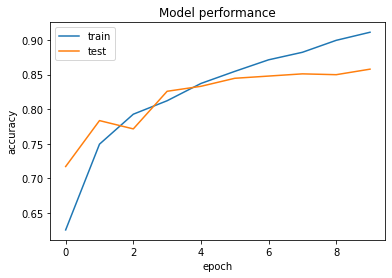

In [75]:
# Model accuracy plot
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Model performance')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

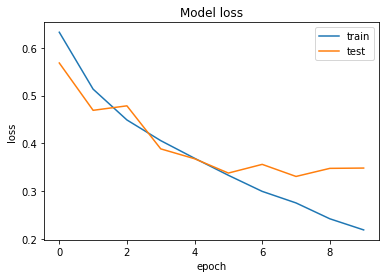

In [76]:
# model loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])